<a href="https://colab.research.google.com/github/thomascerbelaud/M2-IPE-data-energy/blob/main/notebooks/5_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 5.3: Gradient descent

Demonstrate gradient descent by generating synthetic linear data, implementing the algorithm with a cost function, and visualizing its convergence.

## Data Generation

Generate synthetic linear data (e.g., `y = mx + b + noise`) to demonstrate the gradient descent algorithm for a simple linear regression problem.


In [ ]:
import numpy as np

# 2. Define the number of data points
n_samples = 100

# 3. Generate a set of 'x' values
X = 2 * np.random.randn(n_samples, 1)

# 4. Choose a true slope (m_true) and intercept (b_true)
m_true = 3
b_true = 2

# 5. Calculate the 'y' values based on the formula y = m_true * x + b_true
y = m_true * X + b_true

# 6. Generate random noise and add it to the 'y' values
noise = np.random.randn(n_samples, 1) * 2.0
y = y + noise

print(f"Generated {n_samples} data points.")
print(f"First 5 X values:\n{X[:5].flatten()}")
print(f"First 5 y values:\n{y[:5].flatten()}")

Generated 100 data points.
First 5 X values:
[1.75261357 0.8629881  2.04964546 1.63799565 1.36164179]
First 5 y values:
[11.36705895  7.09105502  6.78480043  8.0369528   7.76352379]


## Training

Implement the gradient descent algorithm, including defining a cost function (e.g., Mean Squared Error) and updating model parameters (slope and intercept) iteratively. Train using gradient descent and stochastic (mini batch) gradient descent.


In [ ]:
import numpy as np

# 2. Define the learning rate and the number of iterations
learning_rate = 0.01
n_iterations = 1000


# 3. TODO: Implement the mean squared error (MSE) cost function
def mse_cost(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    return 0.0


def train(X: np.ndarray, y: np.ndarray, n_iterations: int, learning_rate: float, batch_size: int | None = None) -> tuple[list[float], list[float]]:
  """Implement full or stochastic gradient descent."""

  # Create lists to store the cost, m, and b at each iteration
  cost_history = []
  m_history = []
  b_history = []

  # 1. Initialize model parameters (slope 'm' and intercept 'b') with random values
  m = np.random.randn(1)
  b = np.random.randn(1)
  print(f"Initial m: {m[0]:.4f}, Initial b: {b[0]:.4f}")

  n_samples = batch_size or X.shape[0]

  # Implement the gradient descent loop
  for iteration in range(n_iterations):
      # a. Calculate the predicted y_pred
      if batch_size is not None:
        batch_idx = np.random.choice(X.shape[0], size=batch_size)
        X_batch = X[batch_idx]
        y_batch = y[batch_idx]
      else:
        X_batch = X
        y_batch = y

      y_pred = m * X_batch + b

      # b. Calculate the gradients for m and b
      # Gradient of MSE with respect to m: (2/n) * sum((y_pred - y) * X)
      # Gradient of MSE with respect to b: (2/n) * sum(y_pred - y)
      gradients_m = (2/n_samples) * np.sum((y_pred - y_batch) * X_batch)
      # TODO: compute gradients_b
      gradients_b = 0.0

      # c. Update m and b using the calculated gradients and the learning rate
      m = m - learning_rate * gradients_m
      # TODO: update b
      b = 0.0

      # d. Calculate the current cost (MSE) and store it, along with m and b
      current_cost = mse_cost(y_pred, y_batch)
      cost_history.append(current_cost)
      m_history.append(m[0])
      b_history.append(b[0])

  # After the loop, print the final learned values of m and b, and the final cost
  print(f"Learned m: {m[0]:.4f}, Learned b: {b[0]:.4f}")
  print(f"Final MSE cost: {cost_history[-1]:.4f}")
  print()

  return (m_history, b_history), cost_history


history, losses = train(X, y, n_iterations=n_iterations, learning_rate=learning_rate, batch_size=None)
history_batch, losses_batch = train(X, y, n_iterations=n_iterations, learning_rate=learning_rate, batch_size=10)

Initial m: -0.9201, Initial b: 0.7528
Learned m: 3.0227, Learned b: 1.8647
Final MSE cost: 4.2078

Initial m: -1.6848, Initial b: 0.1517
Learned m: 3.0893, Learned b: 1.8746
Final MSE cost: 4.4148



## Visualization

Visualize the synthetic data, the initial random regression line, and the final learned regression line after applying gradient descent. Also, plot the cost function's convergence over iterations.


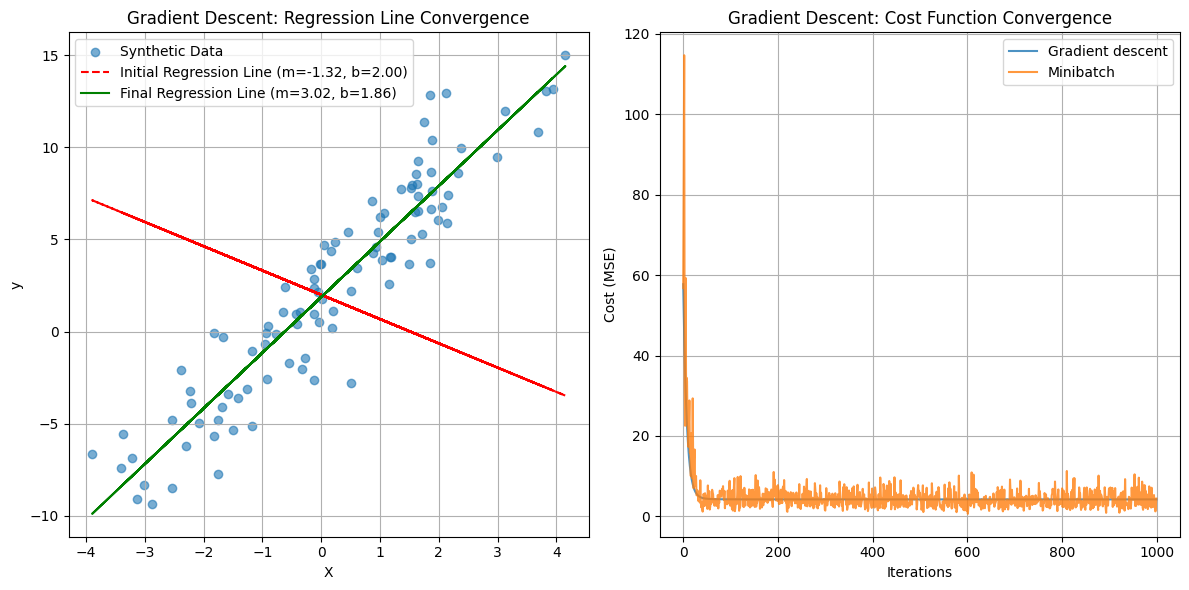

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Regression Lines
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot

# Create a scatter plot of the original synthetic data points
plt.scatter(X, y, label='Synthetic Data', alpha=0.6)

m_initial_plot = np.random.randn(1)
b_initial_plot = np.random.randn(1)
y_initial_pred = m_initial_plot * X + b_initial_plot

# Plot the initial regression line (before gradient descent)
plt.plot(X, y_initial_pred, color='red', linestyle='--', label=f'Initial Regression Line (m={m_initial_plot[0]:.2f}, b={b_initial_plot[0]:.2f})')

# Plot the final learned regression line
m, b = history[0][-1], history[1][-1]
y_final_pred = m * X + b
plt.plot(X, y_final_pred, color='green', linestyle='-', label=f'Final Regression Line (m={m:.2f}, b={b:.2f})')

# Add appropriate labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent: Regression Line Convergence')
plt.legend()
plt.grid(True)

# Subplot 2: Cost Function Convergence
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot

# Plot the cost_history over the n_iterations
plt.plot(range(n_iterations), losses, alpha=.8, label="Gradient descent")
plt.plot(range(n_iterations), losses_batch, alpha=.8, label="Minibatch")
plt.legend()

# Add appropriate labels and title
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent: Cost Function Convergence')
plt.grid(True)

# Use plt.tight_layout() to prevent overlap and plt.show() to display the plots
plt.tight_layout()
plt.show()

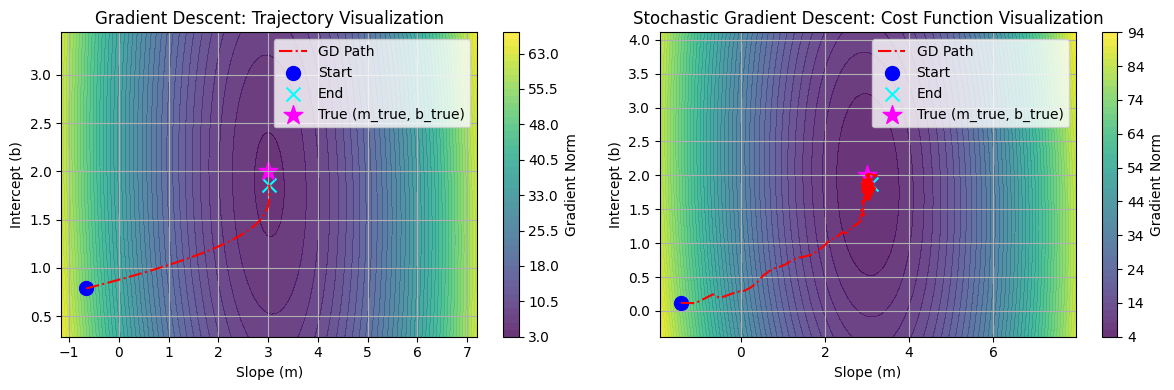

In [ ]:
from typing import Any

import matplotlib.pyplot as plt


def plot_gd_trajectory(ax: Any, m_history: list[float], b_history: list[float], m_true: float, b_true: float):
  # Define a grid for m and b values for visualization
  # Range will be around the initial random values and the final learned values
  m_initial = m_history[0]
  b_initial = b_history[0]
  m_bounds = m_initial, m_initial + 2 * (m - m_initial)
  b_bounds = b_initial, b_initial + 2 * (b - b_initial)
  m_min, m_max = min(m_bounds) - 0.5, max(m_bounds) + 0.5
  b_min, b_max = min(b_bounds) - 0.5, max(b_bounds) + 0.5

  m_grid = np.linspace(m_min, m_max, 100)
  b_grid = np.linspace(b_min, b_max, 100)
  M, B = np.meshgrid(m_grid, b_grid)

  # Calculate the gradient norm for each point in the grid
  Z_grad_norm = np.zeros(M.shape)
  Z_mse_cost = np.zeros(M.shape)

  for i in range(M.shape[0]):
      for j in range(M.shape[1]):
          m_val = M[i, j]
          b_val = B[i, j]

          y_pred_grid = m_val * X + b_val
          gradients_m_grid = (2/n_samples) * np.sum((y_pred_grid - y) * X)
          gradients_b_grid = (2/n_samples) * np.sum(y_pred_grid - y)
          Z_grad_norm[i, j] = np.sqrt(gradients_m_grid**2 + gradients_b_grid**2)
          Z_mse_cost[i, j] = mse_cost(y_pred_grid, y)

  # Create the contour plot of the gradient norm
  # contour = plt.contourf(M, B, Z_grad_norm, levels=50, cmap='viridis', alpha=0.8)
  contour = ax.contourf(M, B, Z_mse_cost, levels=50, cmap='viridis', alpha=0.8)
  plt.colorbar(contour, label='Gradient Norm')

  # Plot the path taken by gradient descent
  ax.plot(m_history, b_history, color='red', linestyle='-.', label='GD Path')

  # Mark the start and end points
  ax.scatter(m_history[0], b_history[0], color='blue', marker='o', s=100, label='Start')
  ax.scatter(m_history[-1], b_history[-1], color='cyan', marker='x', s=100, label='End')

  # Mark the true values
  ax.scatter(m_true, b_true, color='magenta', marker='*', s=200, label='True (m_true, b_true)')

  ax.set_xlabel('Slope (m)')
  ax.set_ylabel('Intercept (b)')
  ax.legend()
  ax.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_gd_trajectory(ax1, history[0], history[1], m_true, b_true)
plot_gd_trajectory(ax2, history_batch[0], history_batch[1], m_true, b_true)
ax1.set_title('Gradient Descent: Trajectory Visualization')
ax2.set_title('Stochastic Gradient Descent: Cost Function Visualization')
plt.tight_layout()
plt.show()